In [2]:
import pandas as pd
import io
import requests

In [3]:
url="https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv"
s=requests.get(url).content
data=pd.read_csv(io.StringIO(s.decode('utf-8')))

In [4]:
data.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [5]:
data.tail()

,Date,Consumption,Wind,Solar,Wind+Solar
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714
4382,2017-12-31,1107.11488,721.176,19.980,741.156


In [6]:
data.shape

(4383, 5)

In [7]:
data.dtypes

Date            object
Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

#### Q1) Set 'Date' column as Index of the dataframe. Be sure the index is a time-series<font color= 'Blue'> (10 points) </font>

In [9]:
data['Date'] = pd.to_datetime(data['Date'])
data['Date']

0      2006-01-01
1      2006-01-02
2      2006-01-03
3      2006-01-04
4      2006-01-05
          ...    
4378   2017-12-27
4379   2017-12-28
4380   2017-12-29
4381   2017-12-30
4382   2017-12-31
Name: Date, Length: 4383, dtype: datetime64[ns]

In [122]:
data_index = data.set_index(['Date', data.index])

In [123]:
data_index

,,Consumption,Wind,Solar,Wind+Solar
Date,,,,,
2006-01-01,0,1069.18400,NaN,NaN,NaN
2006-01-02,1,1380.52100,NaN,NaN,NaN
2006-01-03,2,1442.53300,NaN,NaN,NaN
2006-01-04,3,1457.21700,NaN,NaN,NaN
2006-01-05,4,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
2017-12-27,4378,1263.94091,394.507,16.530,411.037
2017-12-28,4379,1299.86398,506.424,14.162,520.586
2017-12-29,4380,1295.08753,584.277,29.854,614.131


#### Q2) Add New columns as 'Year', 'Month' and 'Name of Weekday' to the new DataFrame <font color= 'Blue'> (10 points) </font>

In [124]:
data.Date=pd.to_datetime(data.Date)
data = data.copy()
data['Year'] = pd.DatetimeIndex(data['Date']).year
data['Month'] = data['Date'].dt.month_name(locale='English')
data['Name of weekday'] = data['Date'].apply(lambda x: dt.datetime.strftime(x, '%A'))

In [125]:
data

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Name of weekday
0,2006-01-01,1069.18400,NaN,NaN,NaN,2006,January,Sunday
1,2006-01-02,1380.52100,NaN,NaN,NaN,2006,January,Monday
2,2006-01-03,1442.53300,NaN,NaN,NaN,2006,January,Tuesday
3,2006-01-04,1457.21700,NaN,NaN,NaN,2006,January,Wednesday
4,2006-01-05,1477.13100,NaN,NaN,NaN,2006,January,Thursday
...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,December,Wednesday
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,December,Thursday
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,December,Friday
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,December,Saturday


#### Q3) Describe the Consumption, Wind, Solar,  Wind+Solar, Year, Month, Weekday Name on 2017-09-23' <font color= 'Blue'> (5 points) </font>

In [128]:
specific_date = data.loc['2017-09-23']
pd.DataFrame(specific_date)

,2017-09-23
Consumption,1191.10345
Wind,28.878
Solar,117.186
Wind+Solar,146.064
Year,2017
Month,September
Name of weekday,Saturday


#### Q4) What is the Consumption, Wind, Solar,  Wind+Solar, Year, Month, Weekday Name between 2017-09-01 and 2017-09-30 <font color= 'Blue'> (10 points) </font>

In [129]:
range_result=data[(data.index>'2017-09-01') & (data.index<'2017-09-30')]
range_result

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Name of weekday
Date,,,,,,,
2017-09-02,1135.72984,37.373,106.189,143.562,2017,September,Saturday
2017-09-03,1057.50932,26.179,140.194,166.373,2017,September,Sunday
2017-09-04,1359.36636,81.042,168.123,249.165,2017,September,Monday
2017-09-05,1391.71549,107.604,135.541,243.145,2017,September,Tuesday
2017-09-06,1421.76263,409.909,92.002,501.911,2017,September,Wednesday
2017-09-07,1406.76505,328.328,100.497,428.825,2017,September,Thursday
2017-09-08,1407.68179,516.670,82.393,599.063,2017,September,Friday
2017-09-09,1187.91825,276.054,63.259,339.313,2017,September,Saturday
2017-09-10,1092.10460,307.774,113.330,421.104,2017,September,Sunday


In [130]:
import matplotlib.pyplot as plt

#### Q5) Use .plot(marker='.',alpha=0.5,linestyle='None', figsize=(11,9)) command to visualize the ['Consumption', 'Solar', 'Wind'] in subplots <font color= 'Blue'> (15 points) </font>

<AxesSubplot:xlabel='Date'>

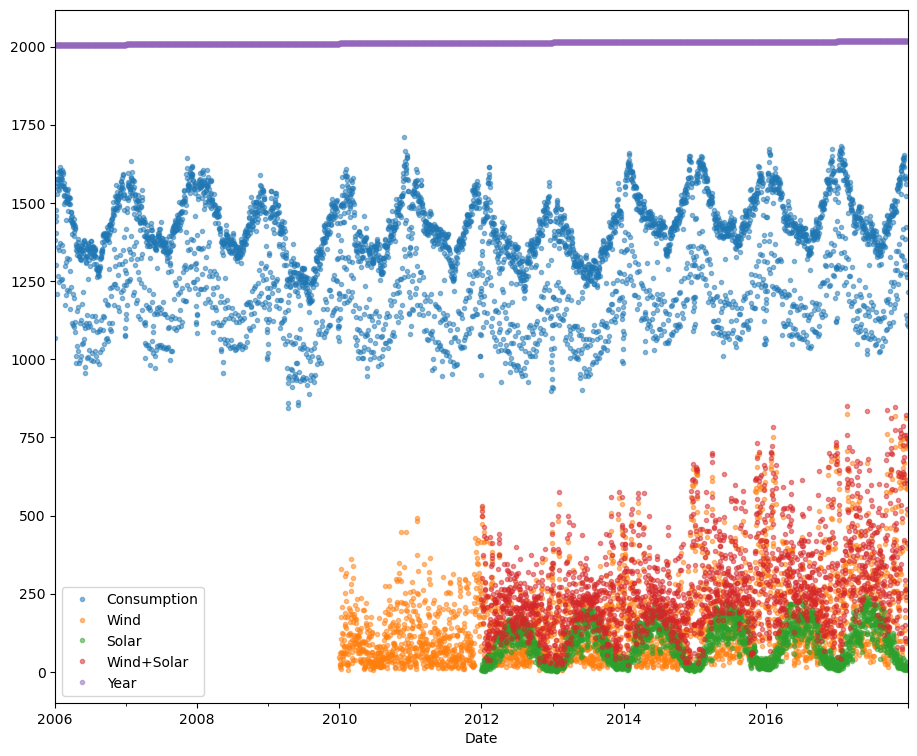

In [132]:
data.plot(marker='.',alpha=0.5,linestyle='None', figsize=(11,9))

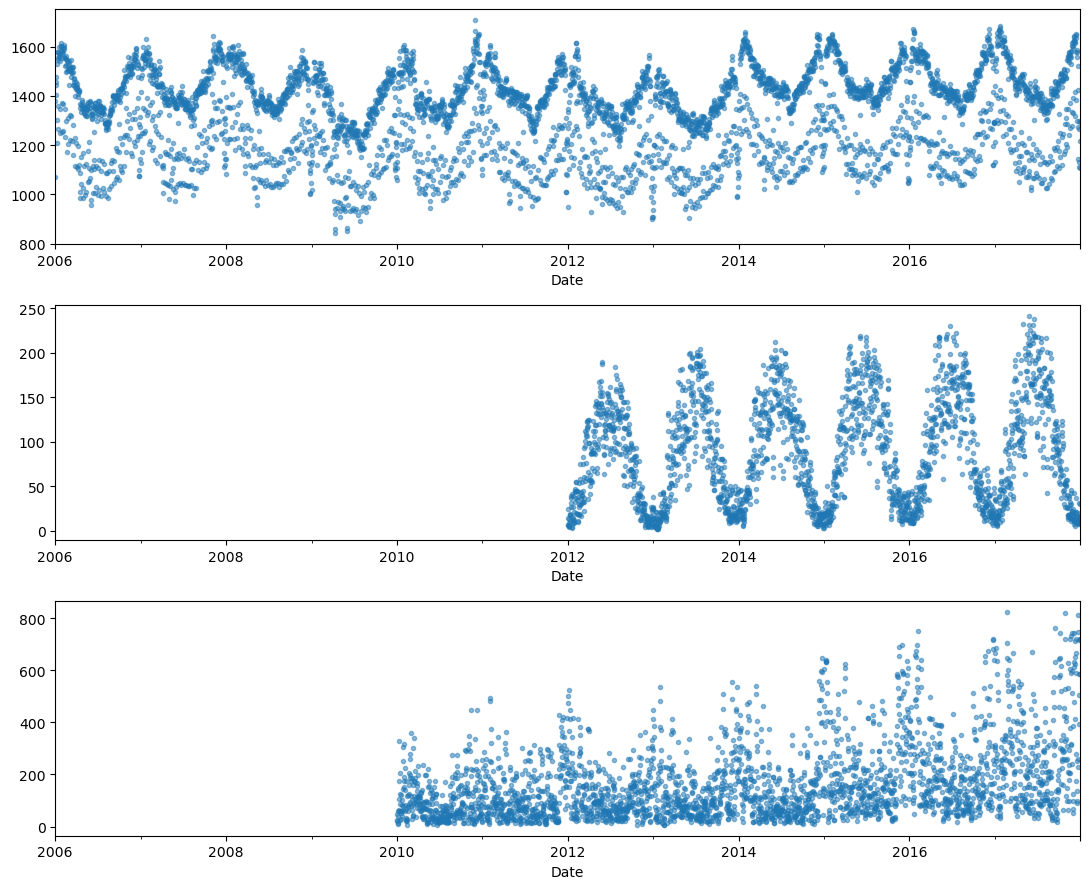

In [135]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(11,9))
data['Consumption'].plot(marker='.', alpha=0.5, linestyle='None', ax=ax[0])
data['Solar'].plot(marker='.', alpha=0.5, linestyle='None', ax=ax[1])
data['Wind'].plot(marker='.', alpha=0.5, linestyle='None', ax=ax[2])
plt.tight_layout()
plt.show()

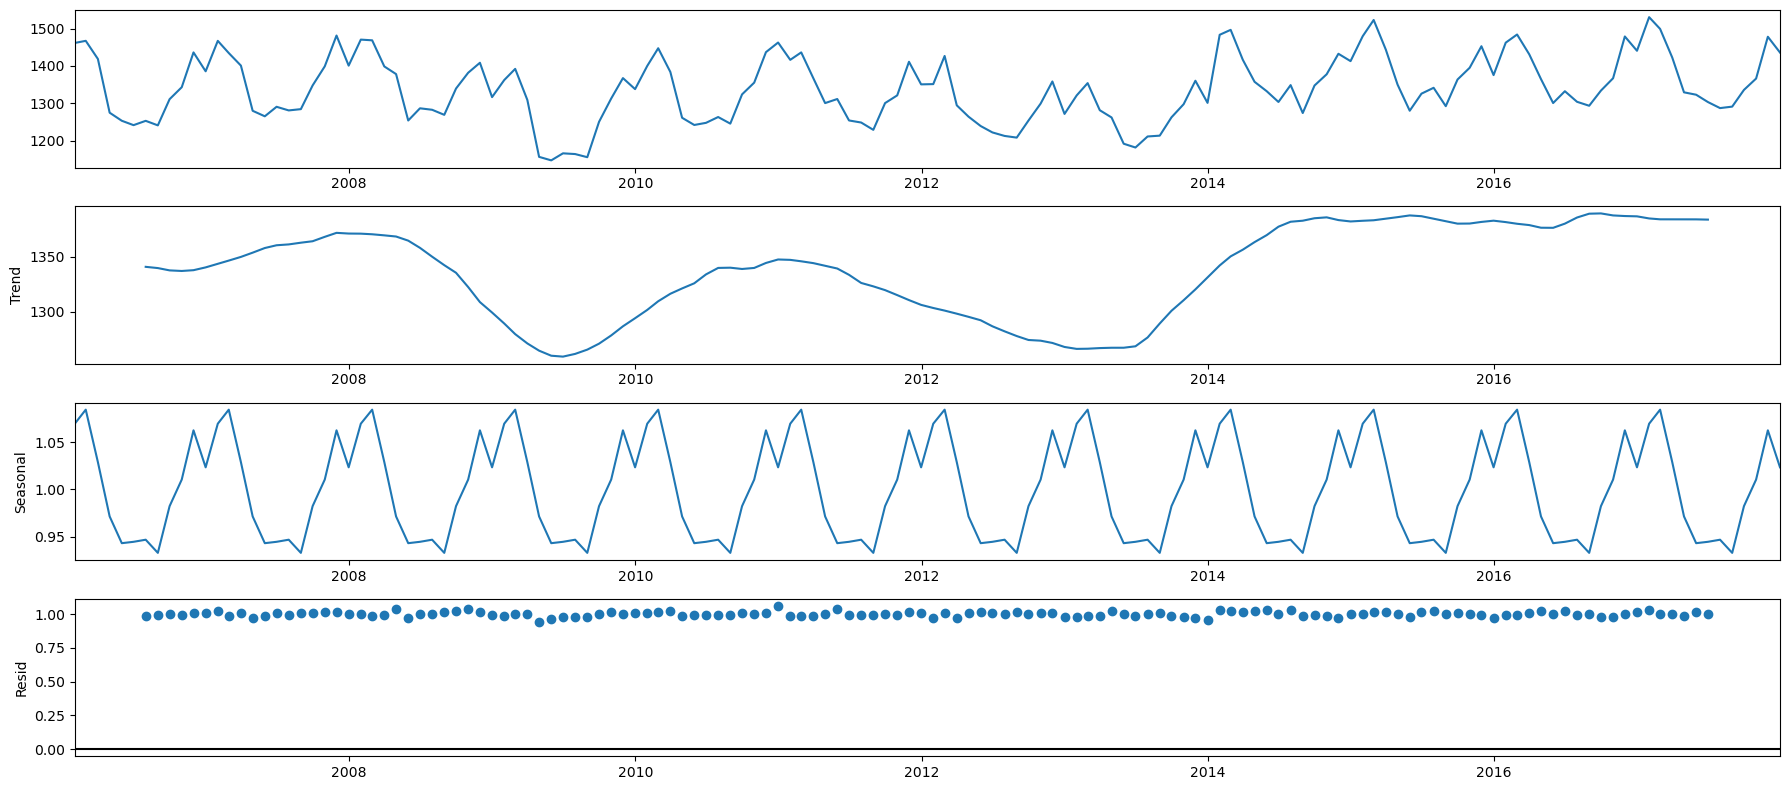

In [159]:
from pylab import rcParams
from statsmodels.tsa.seasonal import seasonal_decompose

#for energy consumption
Consumption = data[['Consumption']]
rcParams['figure.figsize'] = 18,8
y_decompose = seasonal_decompose(Consumption.resample('M').mean(), model='multiplicative')
# additive (linear) vs multiplicative (non-linear)
y_decompose_plot=y_decompose.plot()

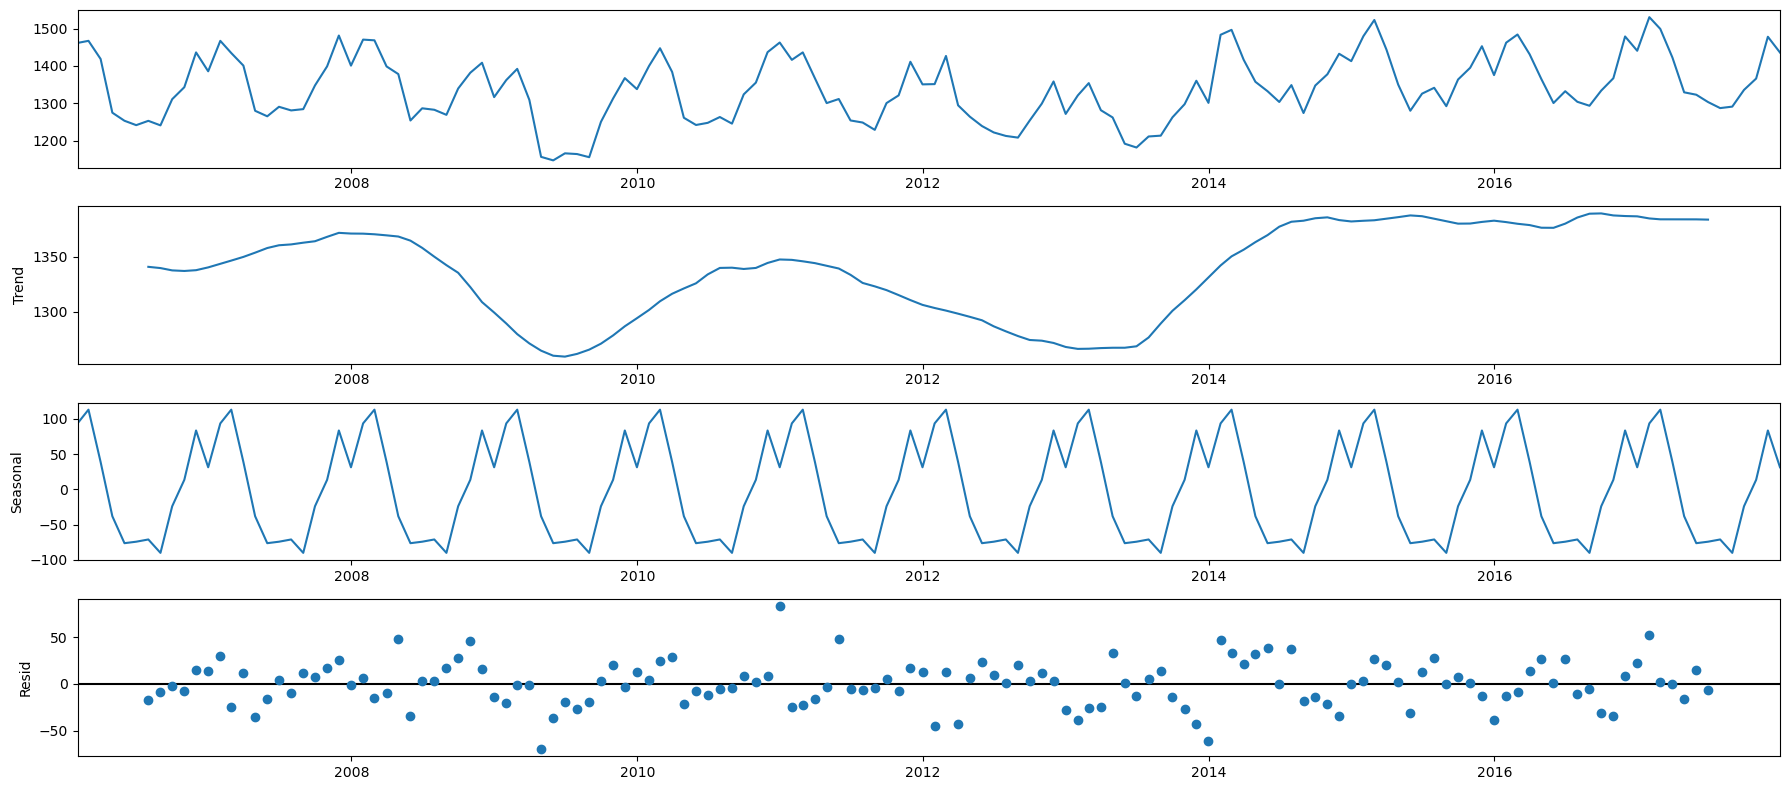

In [138]:
Consumption = data[['Consumption']]
rcParams['figure.figsize'] = 18,8
y_decompose = seasonal_decompose(Consumption.resample('M').mean(), model='additive')
# additive (linear) vs multiplicative (non-linear)
y_decompose_plot=y_decompose.plot()

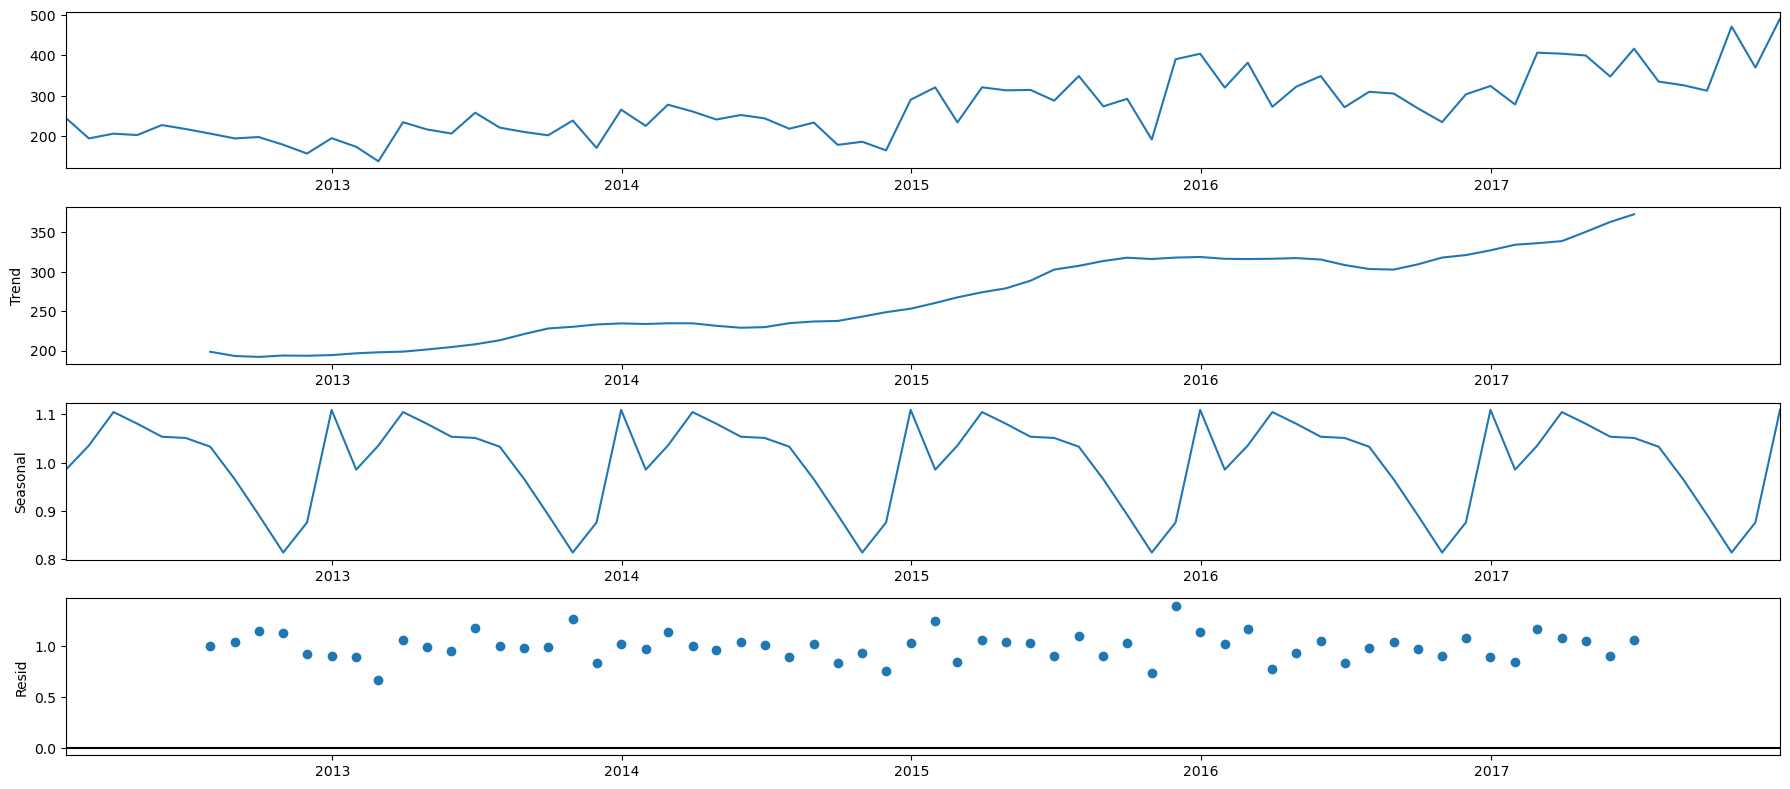

In [144]:
#for solar and wind
# there some missing values in these columns, hence we have to the rows with no NaN values,i.e. from 2012-01-01 
Solar_wind = data[['Wind+Solar']][data[['Wind+Solar']].index.isin(pd.date_range(start = '2012-01-01', end = '2017-12-31', freq='D'))]
rcParams['figure.figsize'] = 18,8
y_decompose = seasonal_decompose(Solar_wind.resample('M').mean(), model='multiplicative')
# additive (linear) vs multiplicative (non-linear)
y_decompose_plot=y_decompose.plot()

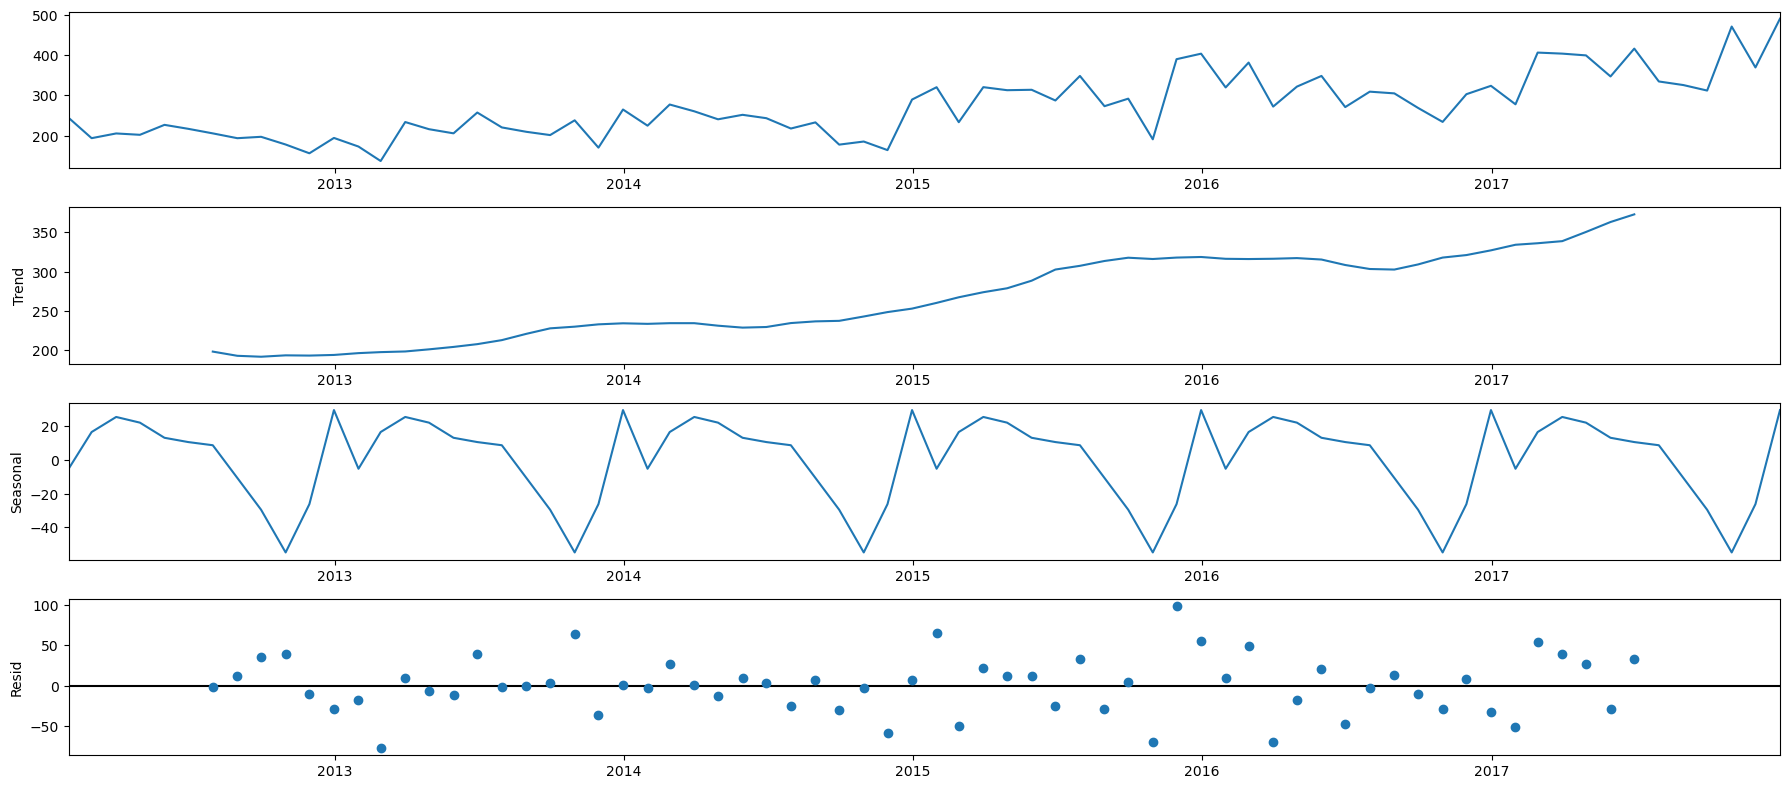

In [145]:
Solar_wind = data[['Wind+Solar']][data[['Wind+Solar']].index.isin(pd.date_range(start = '2012-01-01', end = '2017-12-31', freq='D'))]
rcParams['figure.figsize'] = 18,8
y_decompose = seasonal_decompose(Solar_wind.resample('M').mean(), model='additive')
# additive (linear) vs multiplicative (non-linear)
y_decompose_plot=y_decompose.plot()

#### Q6) According to the graphs interpret the graphs:  <font color= 'Blue'> (15 points) </font>

__1)__ What is the behavior of energy consumption in year/in seasons?

Answer: The energy consumption has a sinusodial wave kind of trend between the 2013 to 2014, from 2015 energy consumption overshoots the maximum amount consumed in the previous years. This implies that there was higher demand for energy from the year, 2015. Similarly, it was also observed from the seasonal display, that the energy consumption is higher at a particular time of the year, which is likely to be the winter seasons i.e. during the cold season. 

__2)__ What can we say about solar/wind production?

Answer: The solar/wind production is in a linear form, i.e it increases as the year increases.

#### Q7) Resample the data (take ['Consumption', 'Wind', 'Solar', 'Wind+Solar'] columns ) to a monthly mean time series. Save the new dataFrame as data_new_mean and give 8 samples on it.  <font color= 'Blue'> (10 points) </font>

In [146]:
data_new_mean = data[['Consumption', 'Wind', 'Solar', 'Wind+Solar']].resample('M').mean()
data_new_mean.sample(8)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2011-06-30,1254.294333,82.333100,NaN,NaN
2013-07-31,1211.503484,55.188548,165.440355,220.628903
2017-11-30,1477.990818,341.966700,27.701467,369.668167
2012-02-29,1426.666241,157.806345,36.093724,193.900069
2012-10-31,1299.330355,120.456161,57.685226,178.141387
2015-10-31,1395.132194,128.318032,62.778742,191.096774
2007-10-31,1398.924581,NaN,NaN,NaN
2014-03-31,1416.458355,151.481067,103.098172,260.671500


#### Q8) Use Rolling transformation to compute the 30-day rolling mean of our daily data.  Save this new dataFrame as data_new_rolling <font color= 'Blue'> (10 points) </font>

In [149]:
data_new_rolling = data.rolling(window = 30).mean()
data_new_rolling

C:\Users\HP\AppData\Local\Temp\ipykernel_3496\2877835737.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['Month', 'Name of weekday'], dtype='object')
  data_new_rolling = data.rolling(window = 30).mean()


,Consumption,Wind,Solar,Wind+Solar,Year
Date,,,,,
2006-01-01,NaN,NaN,NaN,NaN,NaN
2006-01-02,NaN,NaN,NaN,NaN,NaN
2006-01-03,NaN,NaN,NaN,NaN,NaN
2006-01-04,NaN,NaN,NaN,NaN,NaN
2006-01-05,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2017-12-27,1480.999567,429.109500,16.027833,445.137333,2017.0
2017-12-28,1470.482346,428.825933,15.844633,444.670567,2017.0
2017-12-29,1460.185785,444.980067,16.034600,461.014667,2017.0


#### Q9) See the differences betweenolling mean and resampling, let’s update our earlier plot of January 2017-December 2017 wind power production to include the 30-day rolling mean along with the monthly mean resampled time series and the original daily data. <font color= 'Blue'> (15 points) </font> 

In [155]:
wind_data = data[['Wind']][data[['Wind']].index.isin(pd.date_range(start = '2017-01-01', end = '2017-12-31', freq='D'))]
wind_data.head(5)

,Wind
Date,
2017-01-01,307.125
2017-01-02,295.099
2017-01-03,666.173
2017-01-04,686.578
2017-01-05,261.758


In [154]:
wind_rolling= data_new_rolling[['Wind']][data_new_rolling[['Wind']].index.isin(pd.date_range(start = '2017-01-01', end = '2017-12-31'))]
wind_rolling.head(5)

,Wind
Date,
2017-01-01,286.032733
2017-01-02,293.486367
2017-01-03,312.541433
2017-01-04,332.634400
2017-01-05,338.654833


In [153]:
wind_resample= data_new_mean[['Wind']][data_new_mean[['Wind']].index.isin(pd.date_range(start = '2017-01-01', end = '2017-12-31'))]
wind_resample.head(5)

,Wind
Date,
2017-01-31,252.287968
2017-02-28,353.565214
2017-03-31,299.807516
2017-04-30,271.078733
2017-05-31,182.150516


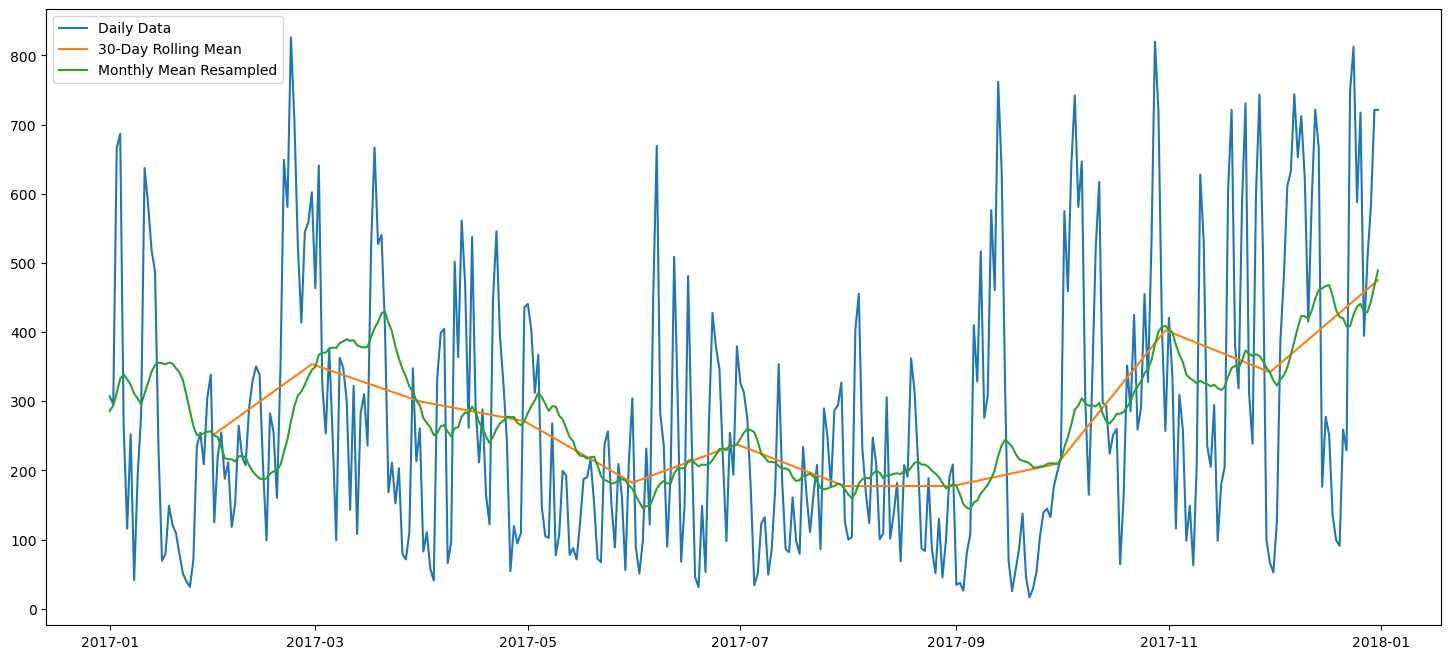

In [158]:
plt.plot(wind_data, label='Daily Data')
plt.plot(wind_resample, label='30-Day Rolling Mean')
plt.plot(wind_rolling, label='Monthly Mean Resampled')
plt.legend()
plt.show()